In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from datetime import datetime

In [33]:

cus_sale = pd.read_csv("customer-shopping-data.csv")

cus_sale

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,Invoice_Date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/5/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/9/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,9/21/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,9/22/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,3/28/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,3/16/2021,Istinye Park


# QUESTION ONE
 BASIC INFO
 
1a. The total number of invoices in the dataset  #99457 INVOICES IN THE DATASET
1b. Number of unique customers
1c. Average age of customers

In [3]:
# 1B 
# TO CHECK THE LENGTH OF UNIQUE VALUES OF CUSTOMERS BY USING THEIR CUSTOMER IDS
n = len(pd.unique(cus_sale["customer_id"]))
print("The length of unique customers are", n)

a= cus_sale.nunique(axis=0)
print("The unique numbers for each columns are", a)

b= cus_sale.customer_id.nunique()
print(f" The unique number of customers is {b} using their various customer Id, cause this helps\
us to check for duplicates")

The length of unique customers are 99457
The unique numbers for each columns are invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
Invoice_Date        797
shopping_mall        10
dtype: int64
 The unique number of customers is 99457 using their various customer Id, cause this helpsus to check for duplicates


In [4]:
# 1c.
avg = cus_sale["age"].mean()

print(f" The average of customers age is {avg}")

 The average of customers age is 43.42708909377922


# QUESTION 2

2a. What are the unique categories of items in the data set?
2b. Which quantity has the highest quantity sold?
2c. Can you find the average price for each category

In [26]:
#2a.
a = pd.DataFrame(cus_sale.category.unique())

print("The 8 unique categories are listed below as:")
a

The 8 unique categories are listed below as:


,0
0,Clothing
1,Shoes
2,Books
3,Cosmetics
4,Food & Beverage
5,Toys
6,Technology
7,Souvenir


In [86]:
b =cus_sale[["quantity", "category"]].copy()

print(b)
print(" WE CAN DEDUCE FROM THIS DATA BELOW THAT THE HIGHEST QUANTITY BOUGHT IS CLOTHS")

# This is the total sum of each categories quantity
c = b.groupby(["category"]).sum("quantity")
c


       quantity         category
0             5         Clothing
1             3            Shoes
2             1         Clothing
3             5            Shoes
4             4            Books
...         ...              ...
99452         5         Souvenir
99453         2  Food & Beverage
99454         2  Food & Beverage
99455         4       Technology
99456         3         Souvenir

[99457 rows x 2 columns]
 WE CAN DEDUCE FROM THIS DATA BELOW THAT THE HIGHEST QUANTITY BOUGHT IS CLOTHS


,quantity
category,
Books,14982
Clothing,103558
Cosmetics,45465
Food & Beverage,44277
Shoes,30217
Souvenir,14871
Technology,15021
Toys,30321


#  PERSONAL DIVERSION

In [87]:
# This is me creating a series using the only two columns i need for this question
b =cus_sale[["price", "category"]].copy()

print(b)

# This is the highest that each of the items were ever sold at
a = b.groupby(["category"]).max("price")

print(a)

# This is the total sum that each of the 8 uniques money spent by customers
c = b.groupby(["category"]).sum("price")

print(c)

# Thus prints the values of those two data sets in descending order according to the price
d= c.sort_values("price", ascending=False)
d


         price         category
0      1500.40         Clothing
1      1800.51            Shoes
2       300.08         Clothing
3      3000.85            Shoes
4        60.60            Books
...        ...              ...
99452    58.65         Souvenir
99453    10.46  Food & Beverage
99454    10.46  Food & Beverage
99455  4200.00       Technology
99456    35.19         Souvenir

[99457 rows x 2 columns]
                   price
category                
Books              75.75
Clothing         1500.40
Cosmetics         203.30
Food & Beverage    26.15
Shoes            3000.85
Souvenir           58.65
Technology       5250.00
Toys              179.20
                       price
category                    
Books              226977.30
Clothing         31075684.64
Cosmetics         1848606.90
Food & Beverage    231568.71
Shoes            18135336.89
Souvenir           174436.83
Technology       15772050.00
Toys              1086704.64


,price
category,
Clothing,31075684.64
Shoes,18135336.89
Technology,15772050.00
Cosmetics,1848606.90
Toys,1086704.64
Food & Beverage,231568.71
Books,226977.30
Souvenir,174436.83


In [90]:
#2c.
print("This below is the average price for each of the categories")
a = b.groupby(["category"]).mean("price")
a

This below is the average price for each of the categories


,price
category,
Books,45.568621
Clothing,901.084021
Cosmetics,122.448626
Food & Beverage,15.671948
Shoes,1807.388568
Souvenir,34.894345
Technology,3156.935548
Toys,107.733185


# QUESTION 3
PAYMENT DISTRIBUTION METHOD

3a)What are the different payment methods used    3b) Create a pie chart to represent the distribution of payment methods.

In [9]:
#3a
a = pd.DataFrame(cus_sale.payment_method.unique())

print(f"The 3 different payment methods used are listed below as:{a}")

The 3 different payment methods used are listed below as:             0
0  Credit Card
1   Debit Card
2         Cash


Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
Cash           0.446897
Credit Card    0.351217
Debit Card     0.201886
Name: payment_method, dtype: float64


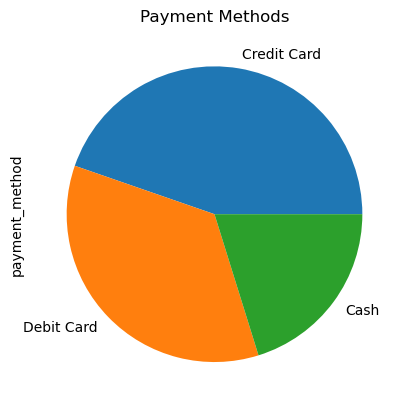

In [31]:
# 3b 
# To first get the distribution pattern of the payment methods 

## a = cus_sale["payment_method"].value_counts(normalize=True)# Prints out the percentage

a = cus_sale["payment_method"].value_counts(normalize=False)# Prints out the percentage
print(a)

percent = a.astype(float)/a.sum()
print(percent)

b= percent.plot(kind="pie",title="Payment Methods", labels=cus_sale["payment_method"])

#plt.show(percent)

# QUESTION 4
SHOPPING INSIGHTS

4a) Which shoppping mall has the most transactions  4b)What is the average quantity of items purchased in each shopping mall?

In [7]:
# 4a)
# This shows howmany times each of those supermarkets were visited, which can be used to show 
# their transaction rate
print("From the data below we can deduce that MALL OF ISTANBUL has the highest transactions")

a = pd.DataFrame(cus_sale["shopping_mall"].value_counts())
a


From the data below we can deduce that MALL OF ISTANBUL has the highest transactions


,shopping_mall
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914
Emaar Square Mall,4811


In [9]:
# First printing out the supermarkets the supermarkets we have
a = cus_sale.shopping_mall.unique()
print(f"This are the 10 different shooping malls available: {a}")

#Now printing out only the shooping mall and quantity columns
b =cus_sale[["shopping_mall", "quantity"]].copy()
print(b)


# This is the sum total highest of each of the items 
c = b.groupby(["shopping_mall"]).mean("quantity")
c

#d= cus_sale["shopping_mall"].groupby["quantity"].mean()
#d



This are the 10 different shooping malls available: ['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']
          shopping_mall  quantity
0                Kanyon         5
1        Forum Istanbul         3
2             Metrocity         1
3          Metropol AVM         5
4                Kanyon         4
...                 ...       ...
99452            Kanyon         5
99453    Forum Istanbul         2
99454         Metrocity         2
99455      Istinye Park         4
99456  Mall of Istanbul         3

[99457 rows x 2 columns]


,quantity
shopping_mall,
Cevahir AVM,2.995191
Emaar Square Mall,3.014134
Forum Istanbul,3.002224
Istinye Park,3.012473
Kanyon,2.999395
Mall of Istanbul,3.014291
Metrocity,2.990740
Metropol AVM,3.004626
Viaport Outlet,2.994709


# QUESTION 5
                              TEMPORAL ANALYSIS

5a) How many invoices are there for each month   5b) Create a line chart to visualize the trend in sales over time

In [14]:
a = cus_sale[["invoice_no", "Invoice_Date"]].copy()
a

,invoice_no,Invoice_Date
0,I138884,8/5/2022
1,I317333,12/12/2021
2,I127801,11/9/2021
3,I173702,5/16/2021
4,I337046,10/24/2021
...,...,...
99452,I219422,9/21/2022
99453,I325143,9/22/2021
99454,I824010,3/28/2021
99455,I702964,3/16/2021


In [17]:
#month = cus_sale["Invoice_Date"].dt.month

df2 = cus_sale.Invoice_Date.copy()
df2

#cus_sale["Invoice_Date"] = pd.to_datetime(cus_sale["Invoice_Date"], format="MMM")

#cus_sale["Invoice_Date"]

0          8/5/2022
1        12/12/2021
2         11/9/2021
3         5/16/2021
4        10/24/2021
            ...    
99452     9/21/2022
99453     9/22/2021
99454     3/28/2021
99455     3/16/2021
99456    10/15/2022
Name: Invoice_Date, Length: 99457, dtype: object

In [24]:
month = re.sub(r"(\d{2})-(\d{2})-(\d{4})","MMM",cus_sale)

month


new_date = cus_sale["Invoice_Date"].apply(strftime,"%d-%m-%y")

new_date

TypeError: expected string or buffer

In [5]:


new_date = cus_sale["Invoice_Date"].apply(strftime,"%d-%m-%y")

new_date

NameError: name 'strftime' is not defined

# QUESTION 6
# Customer gender distribution

6a) How many males and females are in the dataset    6b) Create a bar chart to represent the gender distribution.

In [25]:
#6a)
gender = cus_sale.gender.value_counts()
print("The number of females and males in the dataet are listed below")
gender

The number of females and males in the dataet are listed below


Female    59482
Male      39975
Name: gender, dtype: int64

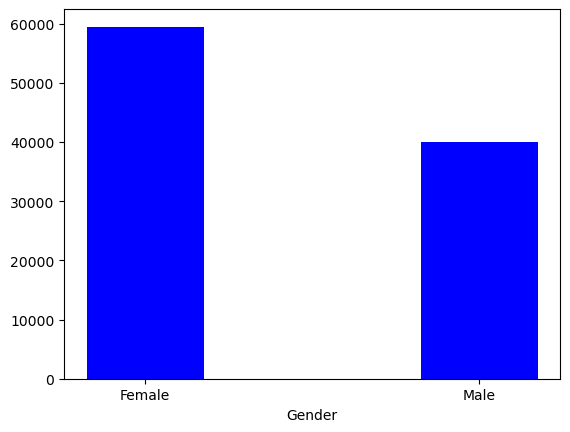

In [18]:
#6b) 
gender = cus_sale.gender.unique()
gender_counts= cus_sale.gender.value_counts()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Gender")
#x.set_ylabel("Count")
ax.bar(gender,gender_counts,width=0.35, color="b", label=("Male","Female"))
plt.show()

# QUESTION 7
# Price analysis

7a) What is the total revenue generated from all invoices  7b) Create a histogram showing the distribution of item prices.

In [3]:
#6a)
# To get the total revenue from all invoices we have to multiply the quantity by the price per 
# quantity but since the dateset PRICE column already contains that, we just sum up the 
# the values in the price column therefore giving us the total revenue from the invoices.

invoice_rev = cus_sale["price"].sum()

print("The total revenue generated from all invoices is equals to", invoice_rev)

The total revenue generated from all invoices is equals to 68551365.91


In [21]:
#7b)
a = cus_sale[["category", "price"]].copy()

a

b = a.groupby(["category"]).sum("price")

b


,price
category,
Books,226977.30
Clothing,31075684.64
Cosmetics,1848606.90
Food & Beverage,231568.71
Shoes,18135336.89
Souvenir,174436.83
Technology,15772050.00
Toys,1086704.64


In [32]:
plt.bar(b, color="red")

plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

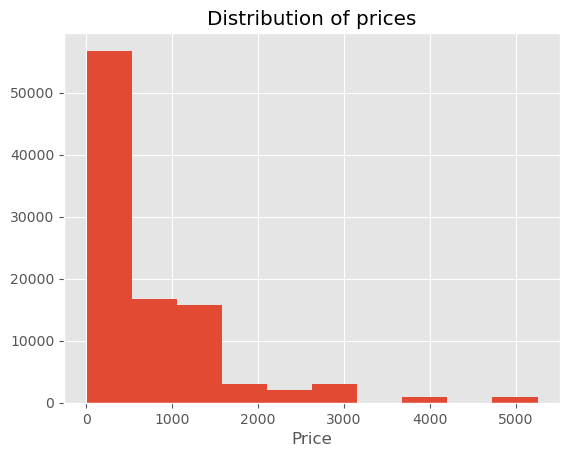

In [98]:
plt.style.use("ggplot")

item_price = cus_sale["price"].values


#bin = pd.cut(items_price, bins=10)# pd.cut is an inbuilt method for getting the bin width which 
# is an importamt aspect of creating a histogram

#bins = np.arange(0,10,1)

hist = plt.hist(item_price)
#histo = np.histogram(item_price.values, bins=bins)
#plt.hist(hist)

plt.title("Distribution of prices")
plt.xlabel("Price")
plt.show()

In [96]:
s = cus_sale["price"].unique()
a = cus_sale.price.value_counts()
a

600.16     6950
1500.40    6940
900.24     6907
1200.32    6849
300.08     6841
121.98     3072
203.30     3055
162.64     3010
5.23       3002
15.69      2992
26.15      2989
40.66      2986
81.32      2974
10.46      2909
20.92      2884
107.52     2082
143.36     2076
1200.34    2045
2400.68    2022
3000.85    2013
1800.51    2010
35.84      2000
179.20     1971
71.68      1958
600.17     1944
35.19      1077
75.75      1029
11.73      1024
3150.00    1009
30.30      1008
4200.00    1001
5250.00    1001
2100.00    1000
45.45      1000
58.65       992
15.15       985
1050.00     985
23.46       984
60.60       959
46.92       922
Name: price, dtype: int64

[1500.4  1800.51  300.08 ...   10.46 4200.     35.19]


In [59]:
plt.show()